In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2024-10-21 21:16:47.684766: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 21:16:47.697882: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 21:16:47.721859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 21:16:47.746408: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 21:16:47.754102: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 21:16:47.782768: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [3]:
# Define a simple CNN model
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (necessary to initialize the model)
model.fit(X_train, y_train, epochs=2, validation_split=0.2)

Epoch 1/2


/home/jass/repos/college9/20XW96 - DEEP LEARNING LAB/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729525610.541329   22699 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-21 21:16:50.541775: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8713 - loss: 0.4069 - val_accuracy: 0.9785 - val_loss: 0.0744
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9792 - loss: 0.0638 - val_accuracy: 0.9823 - val_loss: 0.0622


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/home/jass/repos/college9/20XW96 - DEEP LEARNING LAB/venv/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


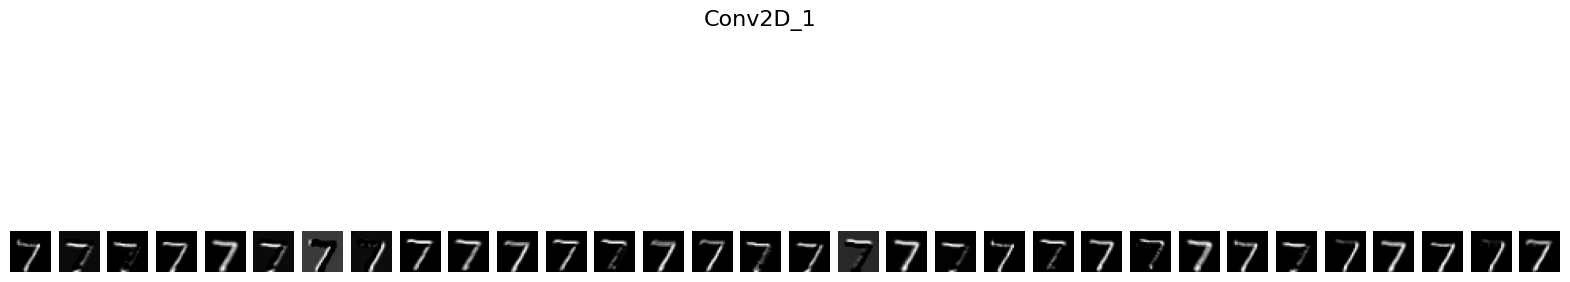

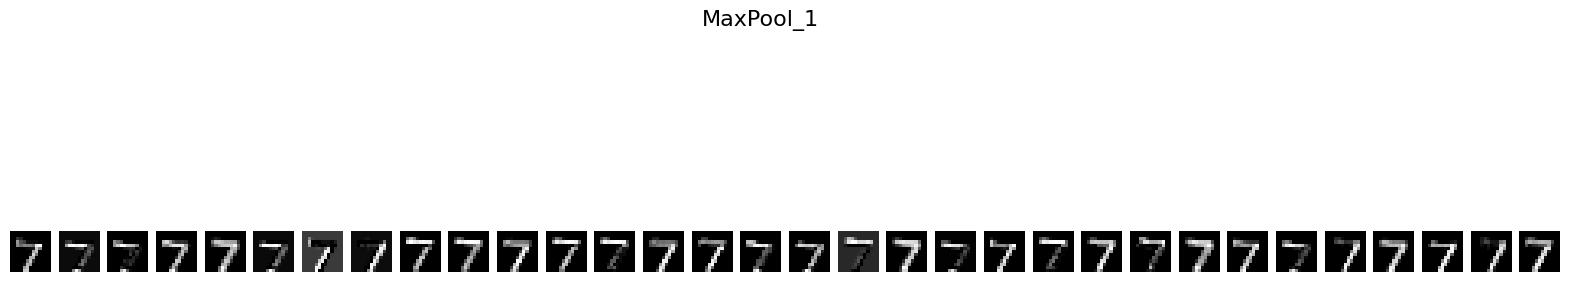

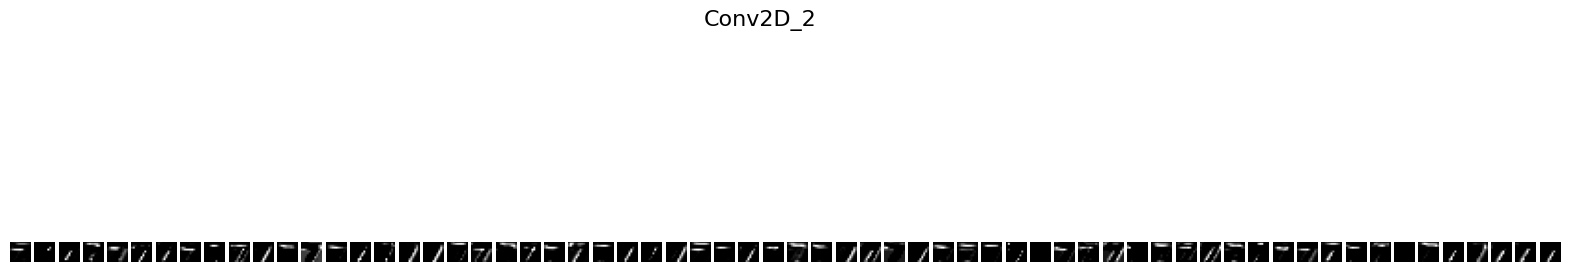

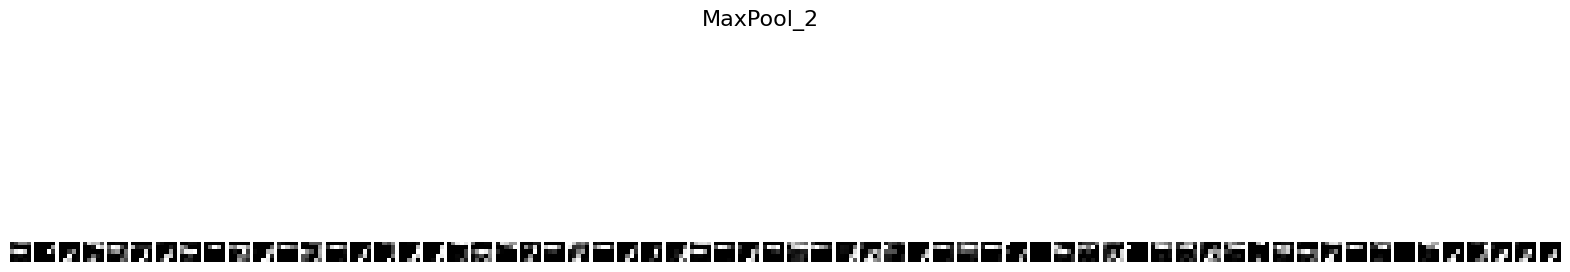

In [6]:
# Define a new model that outputs intermediate layers (feature maps)
# Replace 'layer_name' with actual names from model.summary() if needed
layer_outputs = [model.layers[i].output for i in range(4)]  # Conv and MaxPooling layers
feature_map_model = Model(inputs=model.inputs, outputs=layer_outputs)

# Pick a sample image from the test set
sample_image = X_test[0].reshape(1, 28, 28, 1)

# Generate feature maps for the sample image
feature_maps = feature_map_model.predict(sample_image)

# Function to plot feature maps
def plot_feature_maps(feature_maps, layer_names):
    for fmap, layer_name in zip(feature_maps, layer_names):
        num_filters = fmap.shape[-1]
        size = fmap.shape[1]
        fig, axes = plt.subplots(1, num_filters, figsize=(20, 5))
        fig.suptitle(layer_name, fontsize=16)
        for i in range(num_filters):
            ax = axes[i]
            ax.imshow(fmap[0, :, :, i], cmap='gray')
            ax.axis('off')
        plt.show()

# Layer names for plotting (adjust according to your model's layers)
layer_names = ['Conv2D_1', 'MaxPool_1', 'Conv2D_2', 'MaxPool_2']

# Plot feature maps
plot_feature_maps(feature_maps, layer_names)
